In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv


In [2]:
train_data= pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
train_data.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [3]:
test_data= pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')
test_data.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH


In [4]:
y=train_data.Education

parameters=["Party","Criminal Case","state"]

X=train_data[parameters]

X.head()

,Party,Criminal Case,state
0,DMK,4,TAMIL NADU
1,BJP,0,MADHYA PRADESH
2,INC,0,KARNATAKA
3,BJP,0,BIHAR
4,BJP,2,WEST BENGAL


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])
#X.head()

X_test=test_data[parameters]
label_encoder1 = LabelEncoder()
y_test = label_encoder1.fit_transform(y)
for column in X_test.columns:
    if X_test[column].dtype == 'object':
        X_test[column] = label_encoder1.fit_transform(X_test[column])
X_test.head()

/tmp/ipykernel_19/874911797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
/tmp/ipykernel_19/874911797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
/tmp/ipykernel_19/874911797.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Party,Criminal Case,state
0,9,2,14
1,2,1,27
2,13,3,14
3,2,1,27
4,18,0,25


In [6]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import math 

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=5)

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=5)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

candidate_max_leaf_nodes = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

minimum= 1e9
ans=-1
for max_leaf_node in candidate_max_leaf_nodes:
    my_mae=get_mae(max_leaf_node, train_X, val_X, train_y, val_y)
    if(my_mae<minimum):
        minimum=my_mae
        ans=max_leaf_node


print(ans, minimum)

model=RandomForestClassifier(random_state=52)
model.fit(X,y)

print("Pridictions")
list=model.predict(X_test)
list1=[]
for i in list:
    list1.append(math.ceil(i))
print(len(list1))

3 2.5475728155339805
Pridictions
1374


In [7]:
submission = pd.DataFrame(columns=['ID',"Education"])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_data.Education)
submission['Education'] = label_encoder.inverse_transform(list1)
submission['ID'] = test_data['ID']
submission.to_csv('/kaggle/working/submission.csv',index=False)

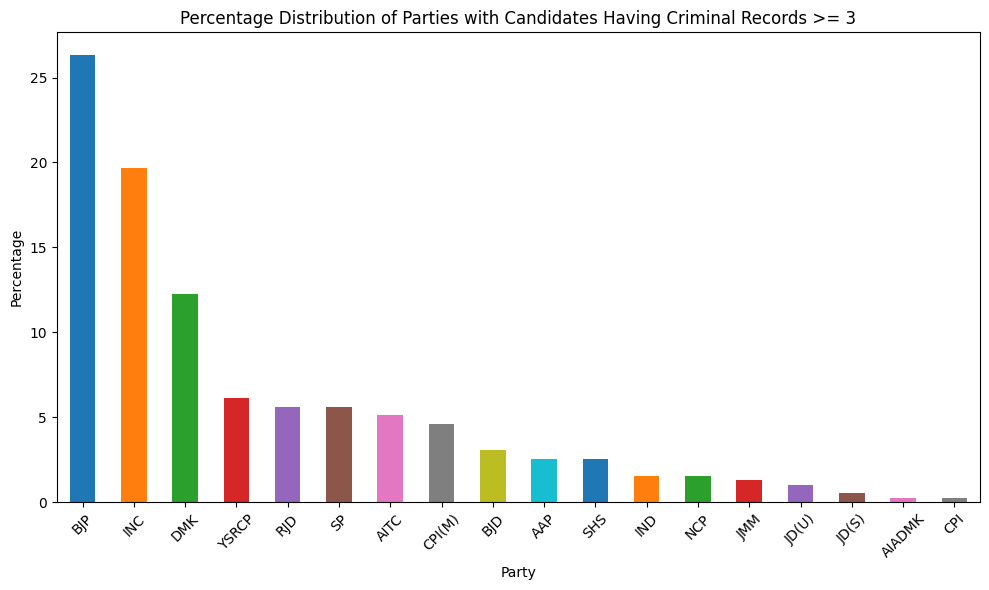

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


filtered_data = train_data[train_data['Criminal Case'] >= 3]


party_distribution = filtered_data['Party'].value_counts(normalize=True) * 100


custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


plt.figure(figsize=(10, 6))
party_distribution.plot(kind='bar', color=custom_colors)
plt.title('Percentage Distribution of Parties with Candidates Having Criminal Records >= 3')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


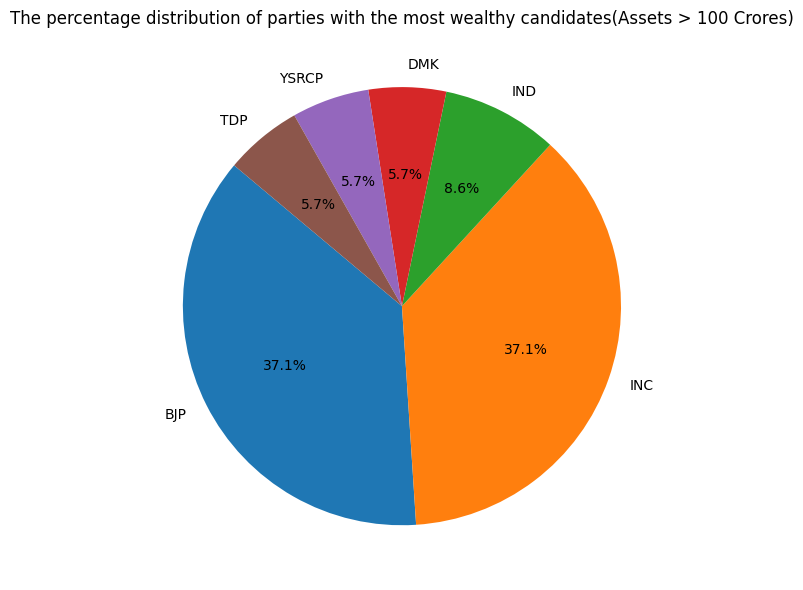

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


def convert_assets(asset_str):
    if 'Crore' in asset_str:
        asset_value = float(asset_str.split()[0])
        return asset_value * 100  
    elif 'Lac' in asset_str:
        return float(asset_str.split()[0])  
    else:
        return 0  


train_data['Total Assets'] = train_data['Total Assets'].apply(convert_assets)


wealthy_data = train_data[train_data['Total Assets'] > 10000]  


party_distribution = wealthy_data['Party'].value_counts(normalize=True) * 100


plt.figure(figsize=(10, 6))
party_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('The percentage distribution of parties with the most wealthy candidates(Assets > 100 Crores)')
plt.ylabel('')  
plt.tight_layout()
plt.show()
